In [11]:
!pip install surprise

from surprise import Dataset, Reader
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.prediction_algorithms.knns import KNNBasic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
from google.colab import files

uploaded = files.upload()

Saving ratings_small.csv to ratings_small (1).csv


<h1>Q2 and Q3a</h1>

In [13]:
reader = Reader(rating_scale=(1, 5))
df=pd.read_csv("ratings_small.csv")
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

<h1>Q3c</h1>

In [14]:
pmf_algorithm = SVD()
user_cf_algorithm = KNNBasic(sim_options={'user_based': True})
item_cf_algorithm = KNNBasic(sim_options={'user_based': False})

pmf_results = cross_validate(pmf_algorithm, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)
user_cf_results = cross_validate(user_cf_algorithm, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)
item_cf_results = cross_validate(item_cf_algorithm, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)

Evaluating MAE, RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.6831  0.6881  0.6906  0.6936  0.6934  0.6897  0.0039  
RMSE (testset)    0.8834  0.8927  0.9019  0.9000  0.9005  0.8957  0.0069  
Fit time          2.31    3.21    3.03    3.10    4.26    3.18    0.62    
Test time         0.20    0.48    0.20    0.72    0.21    0.36    0.21    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7418  0.7404  0.7478  0.7475  0.7419  0.7439  0.0031

<h1>Q3d</h1>

In [15]:
pmf_average_mae = np.mean(pmf_results['test_mae'])
pmf_average_rmse = np.mean(pmf_results['test_rmse'])

user_cf_average_mae = np.mean(user_cf_results['test_mae'])
user_cf_average_rmse = np.mean(user_cf_results['test_rmse'])

item_cf_average_mae = np.mean(item_cf_results['test_mae'])
item_cf_average_rmse = np.mean(item_cf_results['test_rmse'])

print("PMF - Average MAE:", pmf_average_mae)
print("PMF - Average RMSE:", pmf_average_rmse)
print("User-based CF - Average MAE:", user_cf_average_mae)
print("User-based CF - Average RMSE:", user_cf_average_rmse)
print("Item-based CF - Average MAE:", item_cf_average_mae)
print("Item-based CF - Average RMSE:", item_cf_average_rmse)

PMF - Average MAE: 0.6897347070145452
PMF - Average RMSE: 0.8956927160312137
User-based CF - Average MAE: 0.7438835198854308
User-based CF - Average RMSE: 0.9677738986824226
Item-based CF - Average MAE: 0.7208513904197361
Item-based CF - Average RMSE: 0.9349202658302556


<h1>Q3e</h1>

In [16]:
similarity_metrics = ['cosine', 'msd', 'pearson']

ubcf_mae = []
ubcf_rmse = []
ibcf_mae = []
ibcf_rmse = []

for metric in similarity_metrics:
    ubcf_algorithm = KNNBasic(sim_options={'name': metric, 'user_based': True})
    ubcf_results = cross_validate(ubcf_algorithm, data, measures=['MAE', 'RMSE'], cv=5, verbose=False)
    ubcf_mae.append(np.mean(ubcf_results['test_mae']))
    ubcf_rmse.append(np.mean(ubcf_results['test_rmse']))

    ibcf_algorithm = KNNBasic(sim_options={'name': metric, 'user_based': False})
    ibcf_results = cross_validate(ibcf_algorithm, data, measures=['MAE', 'RMSE'], cv=5, verbose=False)
    ibcf_mae.append(np.mean(ibcf_results['test_mae']))
    ibcf_rmse.append(np.mean(ibcf_results['test_rmse']))

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd sim

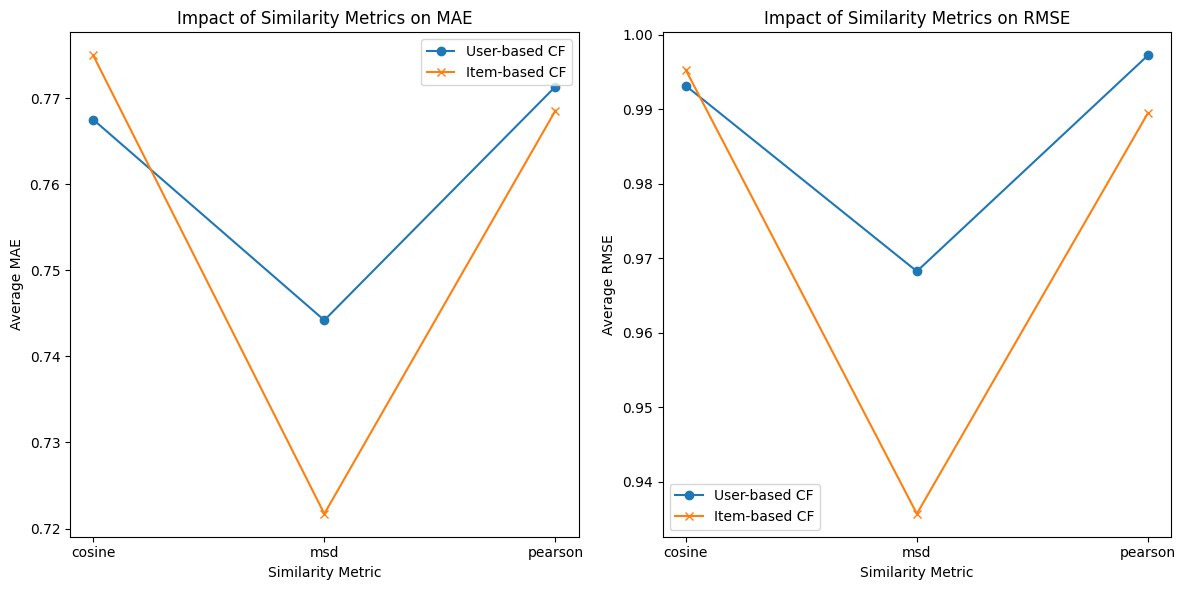

In [17]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(similarity_metrics, ubcf_mae, marker='o', label='User-based CF')
plt.plot(similarity_metrics, ibcf_mae, marker='x', label='Item-based CF')
plt.xlabel('Similarity Metric')
plt.ylabel('Average MAE')
plt.title('Impact of Similarity Metrics on MAE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(similarity_metrics, ubcf_rmse, marker='o', label='User-based CF')
plt.plot(similarity_metrics, ibcf_rmse, marker='x', label='Item-based CF')
plt.xlabel('Similarity Metric')
plt.ylabel('Average RMSE')
plt.title('Impact of Similarity Metrics on RMSE')
plt.legend()

plt.tight_layout()
plt.show()

<h1>Q3f</h1>

In [18]:
num_neighbors_range = [1, 5, 10, 20, 30]

ubcf_mae = []
ubcf_rmse = []
ibcf_mae = []
ibcf_rmse = []

for num_neighbors in num_neighbors_range:
    ubcf_algorithm = KNNBasic(k=num_neighbors, sim_options={'name': 'cosine', 'user_based': True})
    ubcf_results = cross_validate(ubcf_algorithm, data, measures=['MAE', 'RMSE'], cv=5, verbose=False)
    ubcf_mae.append(np.mean(ubcf_results['test_mae']))
    ubcf_rmse.append(np.mean(ubcf_results['test_rmse']))

    ibcf_algorithm = KNNBasic(k=num_neighbors, sim_options={'name': 'cosine', 'user_based': False})
    ibcf_results = cross_validate(ibcf_algorithm, data, measures=['MAE', 'RMSE'], cv=5, verbose=False)
    ibcf_mae.append(np.mean(ibcf_results['test_mae']))
    ibcf_rmse.append(np.mean(ibcf_results['test_rmse']))

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing th

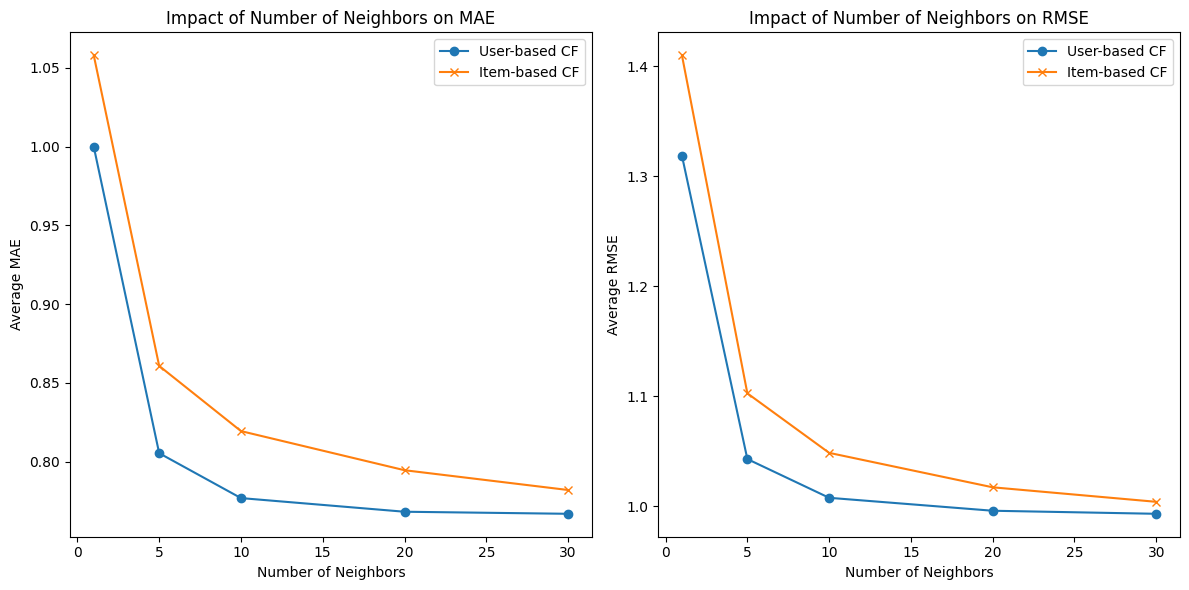

In [19]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(num_neighbors_range, ubcf_mae, marker='o', label='User-based CF')
plt.plot(num_neighbors_range, ibcf_mae, marker='x', label='Item-based CF')
plt.xlabel('Number of Neighbors')
plt.ylabel('Average MAE')
plt.title('Impact of Number of Neighbors on MAE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(num_neighbors_range, ubcf_rmse, marker='o', label='User-based CF')
plt.plot(num_neighbors_range, ibcf_rmse, marker='x', label='Item-based CF')
plt.xlabel('Number of Neighbors')
plt.ylabel('Average RMSE')
plt.title('Impact of Number of Neighbors on RMSE')
plt.legend()

plt.tight_layout()
plt.show()

<h1>Q3g</h1>

In [21]:
best_ubcf_k = num_neighbors_range[np.argmin(ubcf_mae)]
best_ibcf_k = num_neighbors_range[np.argmin(ibcf_mae)]

print("Best UBCF k:", best_ubcf_k)
print("Best IBCF k:", best_ibcf_k)

Best UBCF k: 30
Best IBCF k: 30
